###ACADEMIC INTEGRIY STATEMENT

I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work

In [3]:
!pip install gym

In [4]:
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [5]:
import gym
import matplotlib.pyplot as plt
from gym import wrappers
%matplotlib inline

In [6]:
import matplotlib
matplotlib.__version__

'3.2.2'

In [7]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [8]:
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [9]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) # error only


import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [10]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [11]:
pip install pyglet

Discrete(3)
Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)


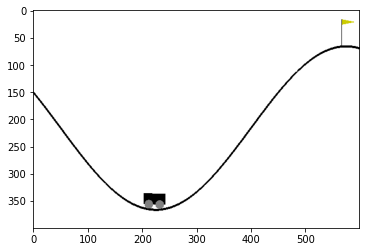

In [12]:
import gym
import pyglet
env = gym.make('MountainCar-v0')
env.reset()
plt.imshow(env.render('rgb_array'))
print(env.action_space)
print(env.observation_space)

In [13]:
# for i_episode in range(20):
#     observation = env.reset()
#     for t in range(100):
#         env.render()
#         print('curr obs = ',observation)
#         action = env.action_space.sample()
#         print('action = ',action)
#         observation, reward, done, info = env.step(action)
#         print('new obs = ',observation)
#         print('reward = ',reward)
#         print('done = ',done)
        
#         if done:
#             print("Episode finished after {} timesteps".format(t+1))
#             break
# env.close()

In [14]:
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action space: Discrete(3)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
from google.colab import widgets
import time
from torch import nn
import torch
from collections import deque
import random

In [16]:
class Network(nn.Module):
  def __init__(self,env):
    super(Network, self).__init__()
    my_features = 2
    self.net = nn.Sequential(nn.Linear(my_features, 32), nn.ReLU(),nn.Linear(32, 32), nn.ReLU(),nn.Linear(32,3))
  
  def forward(self,x):
    return self.net(x)
  
  def act(self,obs):
    pass   

In [17]:
online_net = Network(env)
target_net = Network(env)

# declare replay buffer
replay_buffer = deque(maxlen=5000) #500000

# assign the same parameters of online net to target net
target_net.load_state_dict(online_net.state_dict())

# define optimizer
optimizer = torch.optim.Adam(online_net.parameters(), lr=0.0001) # 0.005

## Double DQN
online_net_ddqn = Network(env)
target_net_ddqn = Network(env)

# declare replay buffer
replay_buffer_ddqn = deque(maxlen=5000) #500000

# assign the same parameters of online net to target net
target_net_ddqn.load_state_dict(online_net_ddqn.state_dict())

# define optimizer
optimizer_ddqn = torch.optim.Adam(online_net_ddqn.parameters(), lr=0.0001) # 0.005

In [18]:
class q_learning:

  def __init__(self):
    self.env = env
    self.env.reset()
    self.totalreward=[]
    self.stepstaken=[]
    self.epsilondecay=[]
    self.epsilon=1
    self.decay=0.9914       #800-0.9914        #0.001,500 - 0.9863            #ep 0.001 - 0.99885 #500(0.01)- 0.991    # 2000 - 0.9978 #6000 - 0.9993
    self.gamma = 0.99

  def reset(self):
    obs = self.env.reset()
    self.env.timestep=0
    self.done1=False
    self.action=0
    self.reward=0   
    self.stepno=0
    self.rewardsum=0
 
    return obs

  # for training
  def action1(self,epsilon,old_state):    
    if np.random.rand()>epsilon:
      old_state_t = torch.as_tensor(old_state,dtype=torch.float32)
      return np.argmax(online_net.forward(old_state_t).tolist())
    else:
      return self.env.action_space.sample()
  
  # for evalution
  def action2(self,epsilon,old_state):
    old_state_t = torch.as_tensor(old_state,dtype=torch.float32)
    return np.argmax(online_net.forward(old_state_t).tolist())
  
  def compute_reward(self,observation,new_observation):
    reward = 100*((math.sin(3*new_observation[0]) * 0.0025 + 0.5 * new_observation[1] * new_observation[1]) - (math.sin(3*observation[0]) * 0.0025 + 0.5 * observation[1] * observation[1]))
    return reward

  # train the model
  def training(self):
    count_step = 1
    for episode in range(800):
      observation = self.reset()      
      while not self.done1:
        
        # get current/old state
        old_state = observation
        
        # choose action based on e-greedy
        action=self.action1(self.epsilon,old_state)
        
        # take step
        new_observation, rew, done, info = env.step(action)
        
        #get reward based on reward function
        reward = self.compute_reward(observation,new_observation)

        # store for plotting purpose
        self.rewardsum+=reward
        self.stepno+=1

        self.done1 = done

        # prepare data for replay buffer
        new_state = new_observation
        if self.done1 == True:
          done_i = 1
        else:
          done_i = 0

        # prepare replay buffer
        trans = (old_state,action,reward,done_i,new_state)
        replay_buffer.append(trans)

        # pass new observation as old observation for next iteration
        observation = new_observation

        # prepare tensor and train model using neural network
        if len(replay_buffer) > 260:  #130
          # sample random batch
          rand_trans = random.sample(replay_buffer, 256) #128

          # convert to array
          obs_arr = np.array([t[0] for t in rand_trans])
          act_arr = np.array([t[1] for t in rand_trans])
          rew_arr = np.array([t[2] for t in rand_trans])
          don_arr = np.array([t[3] for t in rand_trans])
          nobs_arr = np.array([t[4] for t in rand_trans])

          # convert to pytorch array
          obs_t = torch.as_tensor(obs_arr,dtype=torch.float32)
          act_t = torch.as_tensor(act_arr,dtype=torch.int64).unsqueeze(-1)
          rew_t = torch.as_tensor(rew_arr,dtype=torch.float32).unsqueeze(-1)
          don_t = torch.as_tensor(don_arr,dtype=torch.int64).unsqueeze(-1)
          nobs_t = torch.as_tensor(nobs_arr,dtype=torch.float32)

          #compute target
          with torch.no_grad():
            target_q_value_t = target_net.forward(nobs_t)
          max_target_q_value = target_q_value_t.max(dim=1,keepdim=True)[0]            
          target = rew_t + self.gamma*(1-don_t)*max_target_q_value

          # get prediction
          q_value_t = online_net.forward(obs_t)
          action_q_value_t = torch.gather(input=q_value_t,dim=1,index=act_t)

          # compute loss
          loss = nn.functional.smooth_l1_loss(action_q_value_t,target)

          # gradient discent
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

        count_step +=1
        #match online net to target net every few time
        if count_step % 300 == 0: #100,50,300(less disturbance on the end)
          target_net.load_state_dict(online_net.state_dict())
          count_step = 1
            

      if episode % 50 == 0:
        print('episode = ',episode,'total_reward = ',self.rewardsum)
      
      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)
      self.epsilondecay.append(self.epsilon)
      self.epsilon*=self.decay
 
  
  # def get_agent_pos(self):

  #   pos = np.zeros((4,4))      
  #   for row in range(4):
  #     for col in range(4):
  #       if (row == self.env.agent_pos[0] and col == self.env.agent_pos[1]):
  #         pos[row,col] = 1
      
  #   pos = pos.flatten()
  #   return pos
 
  def evaluation(self):
    self.stepstaken=[]
    self.totalreward=[]
    for episode in range(10):
      observation = self.reset()
      while not self.done1:

        # get current/old state
        old_state = observation
        
        # choose action based on e-greedy        
        action=self.action2(self.epsilon,old_state)
        
        # take step
        new_observation, rew, done, info = env.step(action)
        plt.imshow(self.env.render('rgb_array'))
        #get reward based on reward function
        reward = self.compute_reward(observation,new_observation)
        
        self.rewardsum+=reward
        self.stepno+=1

        self.done1 = done

        # pass new observation as old observation for next iteration
        observation = new_observation

      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)
    

In [19]:
class ddqn_learning:

  def __init__(self):
    self.env = env
    self.env.reset()
    self.totalreward=[]
    self.stepstaken=[]
    self.epsilondecay=[]
    self.epsilon=1
    self.decay=0.99655      #800-0.9914        #0.001,500 - 0.9863            #ep 0.001 - 0.99885 #500(0.01)- 0.991    # 2000 - 0.9978 #6000 - 0.9993
    self.gamma = 0.99



  def reset(self):
    obs = self.env.reset()
    self.env.timestep=0
    self.done1=False
    self.action=0
    self.reward=0   
    self.stepno=0
    self.rewardsum=0
 
    return obs

  # for training
  def action1(self,epsilon,old_state):    
    if np.random.rand()>epsilon:
      old_state_t = torch.as_tensor(old_state,dtype=torch.float32)
      return np.argmax(online_net_ddqn.forward(old_state_t).tolist())
    else:
      return self.env.action_space.sample()
  
  # for evalution
  def action2(self,epsilon,old_state):
    old_state_t = torch.as_tensor(old_state,dtype=torch.float32)
    return np.argmax(online_net_ddqn.forward(old_state_t).tolist())
  
  def compute_reward(self,observation,new_observation):
    reward = 100*((math.sin(3*new_observation[0]) * 0.0025 + 0.5 * new_observation[1] * new_observation[1]) - (math.sin(3*observation[0]) * 0.0025 + 0.5 * observation[1] * observation[1]))
    return reward

  # train the model
  def training(self):
    count_step = 1
    for episode in range(2000):
      observation = self.reset()      
      while not self.done1:
        
        # get current/old state
        old_state = observation
        
        # choose action based on e-greedy
        action=self.action1(self.epsilon,old_state)
        
        # take step
        new_observation, rew, done, info = env.step(action)
        
        #get reward based on reward function
        reward = self.compute_reward(observation,new_observation)

        # store for plotting purpose
        self.rewardsum+=reward
        self.stepno+=1

        self.done1 = done

        # prepare data for replay buffer
        new_state = new_observation
        if self.done1 == True:
          done_i = 1
        else:
          done_i = 0

        # prepare replay buffer
        trans = (old_state,action,reward,done_i,new_state)
        replay_buffer_ddqn.append(trans)

        # pass new observation as old observation for next iteration
        observation = new_observation

        # prepare tensor and train model using neural network
        if len(replay_buffer_ddqn) > 130:  #130
          # sample random batch
          rand_trans = random.sample(replay_buffer, 128) #128

          # convert to array
          obs_arr = np.array([t[0] for t in rand_trans])
          act_arr = np.array([t[1] for t in rand_trans])
          rew_arr = np.array([t[2] for t in rand_trans])
          don_arr = np.array([t[3] for t in rand_trans])
          nobs_arr = np.array([t[4] for t in rand_trans])

          # convert to pytorch array
          obs_t = torch.as_tensor(obs_arr,dtype=torch.float32)
          act_t = torch.as_tensor(act_arr,dtype=torch.int64).unsqueeze(-1)
          rew_t = torch.as_tensor(rew_arr,dtype=torch.float32).unsqueeze(-1)
          don_t = torch.as_tensor(don_arr,dtype=torch.int64).unsqueeze(-1)
          nobs_t = torch.as_tensor(nobs_arr,dtype=torch.float32)

          # #compute target
          # with torch.no_grad():
          #   target_q_value_t = target_net.forward(nobs_t)
          # max_target_q_value = target_q_value_t.max(dim=1,keepdim=True)[0]            
          # target = rew_t + self.gamma*(1-don_t)*max_target_q_value
          # evalute online net 
          with torch.no_grad():
            online_for_target_q = online_net_ddqn.forward(nobs_t)
          # evalute target net
          with torch.no_grad():
            target_q_value_t_arr = target_net_ddqn.forward(nobs_t)

          # find argmax of online net and use it to get q value in target net
          iter = 0
          target_q_value_arr = []
          for ten in online_for_target_q:
            action_argmax = torch.argmax(ten).item()
            target_q_value_argmax = target_q_value_t_arr[iter,action_argmax]
            target_q_value_arr.append(target_q_value_argmax)   
            # print('iter',iter)
            # print('online net q values: ',ten)
            # print('online argmax action: ',action_argmax)
            # print('target net action from online argmax action',target_q_value_argmax)
            # print('array to be used to compute target',target_q_value_arr)
            iter +=1

          target_q_value_t = torch.as_tensor(np.array(target_q_value_t_arr),dtype=torch.float32)
          target = rew_t + self.gamma*target_q_value_t


          # get prediction
          q_value_t = online_net_ddqn.forward(obs_t)
          action_q_value_t = torch.gather(input=q_value_t,dim=1,index=act_t)

          # compute loss
          loss = nn.functional.smooth_l1_loss(action_q_value_t,target)

          # gradient discent
          optimizer_ddqn.zero_grad()
          loss.backward()
          optimizer_ddqn.step()

        count_step +=1
        #match online net to target net every few time
        if count_step % 400 == 0: #100,50,300(less disturbance on the end)
          target_net_ddqn.load_state_dict(online_net_ddqn.state_dict())
          count_step = 1
            

      if episode % 200 == 0: #300
        print('episode = ',episode,'total_reward = ',self.rewardsum)
      
      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)
      self.epsilondecay.append(self.epsilon)
      # if more than 20 episode with final goal .. stop running
      if episode>40:
        average_reward = 0
        for i in range(40):
          average_reward+=self.totalreward[episode-i]
        
        if (average_reward/40)>=0.51:
          break

      self.epsilon*=self.decay
 
  def evaluation(self):
    self.stepstaken=[]
    self.totalreward=[]
    for episode in range(10):
      observation = self.reset()
      while not self.done1:

        # get current/old state
        old_state = observation
        
        # choose action based on e-greedy        
        action=self.action2(self.epsilon,old_state)
        
        # take step
        new_observation, rew, done, info = env.step(action)
        plt.imshow(self.env.render('rgb_array'))
        #get reward based on reward function
        reward = self.compute_reward(observation,new_observation)
        
        self.rewardsum+=reward
        self.stepno+=1

        self.done1 = done

        # pass new observation as old observation for next iteration
        observation = new_observation

      self.stepstaken.append(self.stepno)
      self.totalreward.append(self.rewardsum)

In [20]:
def QLimplemetation():
    # print('Implementing Q learning:\n')
    # table1=q_learning()
    # table1.training()

    # plot1 = plt.figure(1)
    # plt.xlabel('Episodes')
    # plt.title('DQN learning results after training for deterministic environment')
    # plt.plot(table1.totalreward)
    # # plt.plot(table1.stepstaken)
    # # plt.legend(['Reward per episode','Steps per episode'],loc='best')

    # plot2 = plt.figure(2)
    # plt.plot(table1.epsilondecay)
    # plt.xlabel('Episodes')
    # plt.ylabel('Epsilon')
    
    # print('Q table values after evaluation:')
    # table1.evaluation()

    # plot3=plt.figure(3)
    # plt.xlabel('Episodes')
    # plt.title('DQN learning results after evaluation for deterministic environment:')
    # plt.plot(table1.totalreward)
    # # plt.plot(table1.stepstaken)
    # # plt.legend(['Reward per episode','Steps per episode'],loc='best')
    # plt.show()
    print('Implementing DQN learning:\n')
    table1=q_learning()
    table1.training()

    print('Implementing Double DQN learning:\n')
    table2=ddqn_learning()
    table2.training()

    plot1 = plt.figure(1)
    plt.xlabel('Episodes')
    plt.title('DQN learning results after training for MountainCar')
    plt.plot(table1.totalreward)
    # plt.plot(table1.stepstaken)
    # plt.legend(['Reward per episode','Steps per episode'],loc='best')

    plot2 = plt.figure(2)
    plt.xlabel('Episodes')
    plt.title('Double DQN learning results during training for MountainCar')
    plt.plot(table2.totalreward)

    plot3 = plt.figure(3)
    plt.xlabel('Episodes')
    plt.title('Compare between DQN and Double DQN during training for MountainCar')
    plt.plot(table1.totalreward)
    plt.plot(table2.totalreward)
    plt.legend(['DQN','Double DQN'],loc='best')

    plot4 = plt.figure(4)
    plt.plot(table1.epsilondecay)
    plt.xlabel('Episodes')
    plt.ylabel('Epsilon decay for DQN')

    plot5 = plt.figure(5)
    plt.plot(table2.epsilondecay)
    plt.xlabel('Episodes')
    plt.ylabel('Epsilon decay for Double DQN')

    print('Evaluation results:')
    table1.evaluation()
    table2.evaluation()

    plot6=plt.figure(6)
    plt.xlabel('Episodes')
    plt.title('Compare between DQN and Double DQN during evaluation for MountainCar:')
    plt.plot(table1.totalreward)
    plt.plot(table2.totalreward)
    plt.legend(['DQN','Double DQN'],loc='best')
    # plt.plot(table1.stepstaken)
    # plt.legend(['Reward per episode','Steps per episode'],loc='best')
    plt.show()


Implementing DQN learning:

episode =  0 total_reward =  0.021677451776299123
episode =  50 total_reward =  0.1717393963715123
episode =  100 total_reward =  0.3569149264218469
episode =  150 total_reward =  0.5786309562124967
episode =  200 total_reward =  0.5634742621139367
episode =  250 total_reward =  0.33950277653773103
episode =  300 total_reward =  0.5720932160103811
episode =  350 total_reward =  0.5627828542179725
episode =  400 total_reward =  0.6050086757445724
episode =  450 total_reward =  0.5152959500910053
episode =  500 total_reward =  0.5057750403616148
episode =  550 total_reward =  0.5010746914832923
episode =  600 total_reward =  0.6026429056755415
episode =  650 total_reward =  0.609578383635647
episode =  700 total_reward =  0.6147666523251236
episode =  750 total_reward =  0.6148061840508012
Implementing Double DQN learning:



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:136: UserWarning: Using a target size (torch.Size([128, 3])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


episode =  0 total_reward =  0.013024913196097538
episode =  200 total_reward =  0.04910036494159823
episode =  400 total_reward =  0.4522419374264309
episode =  600 total_reward =  -0.0023946781128837344
episode =  800 total_reward =  0.50185700370273
episode =  1000 total_reward =  0.1044471062275381
Evaluation results:


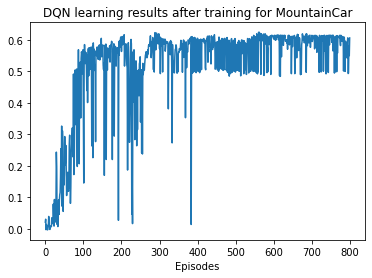

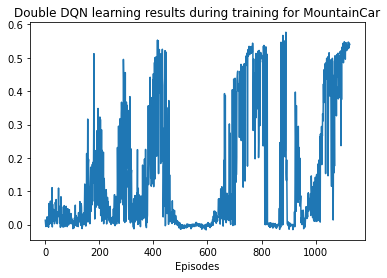

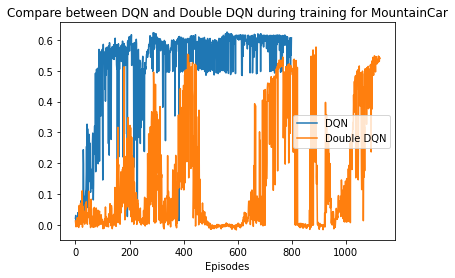

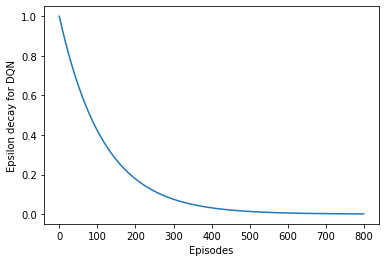

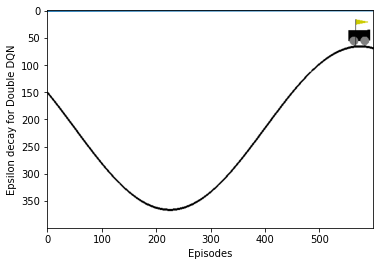

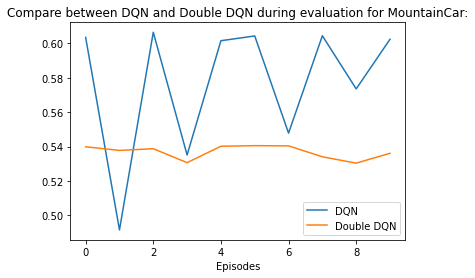

In [21]:
if __name__ == "__main__":
  QLimplemetation()